# Table of Content: <a class="anchor" id="table-of-content"></a>
* [1. Problem Background and Motivation](#problem-background)
* [2. Libraries and Custom Functions](#import-packages)
* [3. Data Exploration/Prep](#data-prep)
* [4. Machine Learning Model](#ml-model)
* [5. Deployment of Model](#model-deployment)


## 1. Problem Background and Motivation <a class="anchor" id="problem-background"></a>

[Go to Top of Notebook](#table-of-content)



## Flight Delays

![Flight delays  ??](http://mrpassenger.com/wp-content/uploads/2017/09/flight-delays.jpg)


>**Flight delays are a common occurrence in the travel industry, and most of us will experience them at some point. However, going through it can be incredibly stressful, and many people are left unsure of what to do. Will they be able to reach their destination? Why was my flight initially delayed? What is the average frequency of flight delays?**

>**Main reasons for flight delays?**
* flight delays are caused by the late arrival of the aircraft
* disruptions are the result of a National Aviation System decision
* caused by bad weather
* responsibility of the air carrier

>**What if you could predict the likelihood of a flight being delayed in advance? Flight delays and cancellations are two of the most prevalent travel hassles. Still plan to reserve it? What if there was a connection?**



###  How Frequent is flight delay??
* According to a recent study performed by experts the cost of domestic flight delays causes 32.9 billion dollar dent to US econmoy


![How frequent is flight delays ](https://i.redd.it/eyzfcth2z65z.png)




### Is This Probelms Only In US?? :

## NO  


* After covid ,rapid recovery of air travel has come up against a massive shortage in staffing at aiports and airlines 
* In 2022 , Europe became the epicenter for summer's travel chaos.
* Travelers in Europe are paying ever more for a plane ticket and yet have less chance of actually making it to their destination


### Is It a Matter of concern??

* Yes, Its a matter of concern as this is impacting the travel plan and huge cost to traveller.
* It impacts individual trip, affecting the journey bookings like hotel reservation.
* The top factors affecting the flight delays is **airline**


![Flight delay ](https://www.bts.gov/sites/bts.dot.gov/files/Delay%20Cause%20by%20Year%2C%20Percent%20of%20Total%20Delay%20Minutes_1.jpg)


* [Go to Top](#table-of-content)


## 2. Libraries and Custom Functions  <a class="anchor" id="import-packages"></a>


[Go to Top of Notebook](#table-of-content)


In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format
import numpy as np

# Graphics
import seaborn as sns
import matplotlib.pyplot as plt
#import plotly.graph_objects as go

# ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn import metrics


# Custom function below is used to display performance measures
# Required inputs are the model name and the two test data objects (X,y)
def class_perf_measures(model,X_test,y_test):
    # Create empty lists to store metric values created within loop
    TP = []
    TN = []
    FP = []
    FN = []
    recall = []
    precision = []
    F1 = []
    Accuracy = []
    
    # Create list of probability threshold values to loop over
    threshold = np.arange(0,1.1,0.1).tolist()

    # Start loop
    for i in threshold:

        # Create class assignments given threshold value
        y_test_pred_class = (model.predict_proba(X_test)[:,1] >= i).astype(int)

        # Append lists with metric values
        TP.append(metrics.confusion_matrix(y_test, y_test_pred_class)[1,1])
        TN.append(metrics.confusion_matrix(y_test, y_test_pred_class)[0,0])
        FP.append(metrics.confusion_matrix(y_test, y_test_pred_class)[0,1])
        FN.append(metrics.confusion_matrix(y_test, y_test_pred_class)[1,0])
        recall.append(metrics.recall_score(y_test, y_test_pred_class).round(3))
        precision.append(metrics.precision_score(y_test, y_test_pred_class).round(3))
        F1.append(metrics.f1_score(y_test, y_test_pred_class).round(2))
        Accuracy.append(metrics.accuracy_score(y_test, y_test_pred_class).round(2))

    # Create dataframe
    result = pd.DataFrame({"threshold":threshold,
                           "TP":TP,
                           "TN":TN,
                           "FP":FP,
                           "FN":FN,
                           "Precision":precision,
                           "Recall":recall,
                           "Accuracy": Accuracy
                          })

    # Let's look at our dataframe
    return result

# 3. Data Exploration/Prep <a class="anchor" id="data-prep"></a>
* [Go to Top of Notebook](#table-of-content)

 [X] [Initial Evaluation](#initial-evaluation)
- [X] [Data Partitioning](#data-split)
- [X] [Data Normalization](#normalization)

> **Initial Evaluation** <a class="anchor" id="initial-evaluation"></a>


>[Go to Data Prep Outline](#data-prep)

>The purpose of this step is to know your data.Before putting values in Train/Test model.
There could be outliers,null data that could cause an error or wrong prediction in our analysis 


![Steps before deploying the data into Model](https://miro.medium.com/max/3460/1*13uV1HSrv5NefuFo85lkrg.png)


In [2]:
df = pd.read_csv('FlightDelays_Clean.csv')                       #loading the data from CSV file 
                                                     #Pandas is written as pd 
df.tail()                                          #diplaying data from bottom five rows to observe the data set 

,status_delayed,sch_dep_time,carrier_delta,carrier_us,carrier_envoy,carrier_continental,carrier_discovery,carrier_other,dest_jfk,dest_ewr,dest_lga,distance,origin_dca,origin_iad,origin_bwi,bad_weather,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
2196,0,21.33,0,0,0,0,1,0,0,0,1,229,0,1,0,0,0,0,0,1,0,0,0
2197,0,21.33,0,0,0,0,1,0,0,0,1,229,0,1,0,0,0,0,0,0,1,0,0
2198,0,21.33,0,0,0,0,1,0,0,0,1,229,0,1,0,0,0,0,0,0,0,1,0
2199,0,21.33,0,0,0,0,1,0,0,0,1,229,0,1,0,0,0,0,0,0,0,0,1
2200,0,21.33,0,0,0,0,1,0,0,0,1,229,0,1,0,0,1,0,0,0,0,0,0


> **Data Partitioning** <a class="anchor" id="data-split"></a>
<br>
>To Do:<br>
>1. Put all potential predictor variables into new object called 'X'
>2. Put target variable in new object called 'y'
>3. Partition data into training set and testing set<br>

>This technique is best practice when creating a predictive model.

>1. Data spliting is typically done to avoid over fitting
>2. Allows to develop highly accurate models that are relevant to data sets collected in future
>3. Main objective is to build predictive model with interpretable weights and parameters that can be used in future applications<br>

![Data partition ](http://image1.slideserve.com/3466305/data-partitioning-n.jpg)




In [ ]:
target = ['status_delayed']

X = df.drop(target,axis=1)
y = df[target]

# Split data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=4)

>1. Here we have taken the test size =0.3 , these can be also be reduced to 0.2 or increase to 0.4 so on and model prediction can be checked .
>2.Random state value can also be change to check the accuracy of the KNN and Logistics model are giving.
>3.with different Iteration , I found test size 0.3 and random state =4 , in which model predicts good.

> **Data Normalization** <a class="anchor" id="normalization"></a>
<br><br>
>**Note:**<br>
>We do this AFTER splitting the data because we only want to use summary stats<br>
>from the TRAINING data to normalize BOTH TRAIN and TEST data<br>
<br><br>
>It helps us to improve our model accuracy
>Each variable is given equal weights/importance through normalisation, preventing the performance of the model from being influenced by a single variable simply because it has larger values.



![Normalization ](https://blog.featurelabs.com/content/images/2019/08/BlogPost-01.png)


In [4]:
# Normalize predictor variables using Z-Scores.
# we are using means and standard deviations of features as calculated in the TRAINING DATA
# New values are centered at 0.These values reflect the standard deviations
.
features_means = X_train.mean()
features_std = X_train.std()

X_train = (X_train - features_means)/features_std
X_test = (X_test - features_means)/features_std

# 4. Machine Learning <a class="anchor" id="ml-model"></a>

- [X] [kNN](#first-model)
- [X] [Logistic Model](#second-model)
- [ ] [Performance Evaluation](#third-model)

![Machine learning](https://miro.medium.com/max/3460/1*13uV1HSrv5NefuFo85lkrg.png)


* [Go to Top](#table-of-content)

> **kNN** <a class="anchor" id="first-model"></a>
<br>
>Instructions:<br>
>1. Fit numerous kNN models using different values for k. <br>
>2. Choose the "best" value for "k" based on Accuracy

>KNN can be used for both classification and regression predictive problems. However, it is more widely used in classification problems in the industry. To evaluate any technique we generally look at 3 important aspects:
>1. Ease to interpret output
>2. Calculation time
>3. Predictive Power

![KNN Model](https://machinelearninghd.com/wp-content/uploads/2021/02/knn.png)

In [5]:
# 1. train a classifier for different values of k
results = []
for k in [1,3,5,7,9,11,13,15,17,19,21]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train.values.ravel())
    
    # Get predicted class
    y_pred_class = knn.predict(X_test)
    
    # Put Accuracy Score in results object
    results.append({'k':k,
                    'accuracy':metrics.accuracy_score(y_test,y_pred_class)
                   }
                  )
# Put results from above into a Pandas Dataframe
results_df = pd.DataFrame(results)
results_df

,k,accuracy
0,1,0.75
1,3,0.78
2,5,0.80
3,7,0.79
4,9,0.80
5,11,0.80
6,13,0.79
7,15,0.81
8,17,0.81
9,19,0.81


>**Decision:**<br>
Based on the results above, I will set my number of neighbors (k) to 15 as this is the lowest and achieves the highest accuracy value<br>

>**Re-run kNN using the K value selected above:**<br>
For this final run of kNN, we will produce a table of performance measures across a range of probability threshold values

In [6]:
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(X_train,y_train.values.ravel())

# Let's do a quick check to see if we have to worry about problems of overfitting.
# Note !!  Small value "k" in kNN tend to lead to overfitting.
# Large value "k" in kNN tend to produce underfit models
y_train_pred_class = knn.predict(X_train)
y_test_pred_class = knn.predict(X_test)

print('Training data Accuracy:', metrics.accuracy_score(y_train,y_train_pred_class).round(2))
print(confusion_matrix(y_train,y_train_pred_class))

print('Testing data Accuracy:', metrics.accuracy_score(y_test,y_test_pred_class).round(2))
print(confusion_matrix(y_test,y_test_pred_class))


Training data Accuracy: 0.82
Testing data Accuracy: 0.81


>**Logistic Model:**<br>

>Logistic model helps us in classification of data<br>

>1.basically a classification algorithm that comes under the Supervised category a type of machine learning in which machines are trained using **"labelled" data, and on the basis of that trained data, the output is predicted**.<br>

>2.Let's produce the same table above but this time using a Logistic Model.<br>

>3.In simple words, categorical dependent variable means a variable that is binary in nature having its data coded in the form of **either 1 (stands for success/yes) or 0 (stands for failure/no)**.<br>

>4.Logistic function gets its characteristic ‘S’ shape due to the range it varies in, that is 0 and 1 as shown in the figure **below**.<br>

![Logistic Model](https://miro.medium.com/max/552/1*U_WqyY5vnhxPPVs_QBg_xg.png)



In [7]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train.values.ravel())

y_train_pred_class = lr_model.predict(X_train)
y_test_pred_class = lr_model.predict(X_test)

print('Training data Accuracy:', metrics.accuracy_score(y_train,y_train_pred_class).round(2))
print('Testing data Accuracy:', metrics.accuracy_score(y_test,y_test_pred_class).round(2))

Training data Accuracy: 0.82
Testing data Accuracy: 0.82


>Accuracy was calculated for above model KNN and logistics model

>**Winning Model:**<br>
We need to quickly decide which modeling framework to go forward with<br>
we will be using AUCof two models and will choose the model that gives us the highest value


![Winning Model](https://d1jnx9ba8s6j9r.cloudfront.net/blog/wp-content/uploads/2019/07/The-Monty-Hall-Problem-Bayesian-Networks-Edureka-300x113.png)

C:\Users\sarth\anaconda3\envs\Practise\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


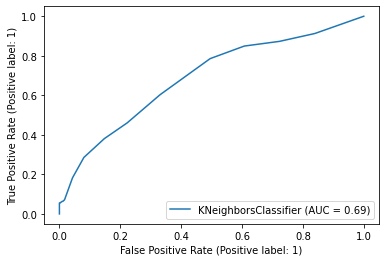

C:\Users\sarth\anaconda3\envs\Practise\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


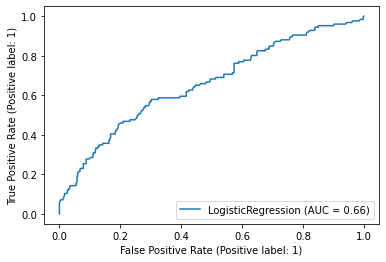

In [8]:
# ROC curve for kNN
metrics.plot_roc_curve(knn,X_test,y_test)
plt.show()

# ROC curve for Logistic Model
metrics.plot_roc_curve(lr_model,X_test,y_test)
plt.show()

>**Decision Point:**<br>
AUC is highest for our KNN Model so I will use that model to further evaluate probability thresholds and corresponding performance measures

In [9]:
class_perf_measures(knn,X_test,y_test)

,threshold,TP,TN,FP,FN,Precision,Recall,Accuracy
0,0.00,126,0,535,0,0.19,1.00,0.19
1,0.10,107,210,325,19,0.25,0.85,0.48
2,0.20,76,358,177,50,0.30,0.60,0.66
3,0.30,48,456,79,78,0.38,0.38,0.76
4,0.40,23,512,23,103,0.50,0.18,0.81
5,0.50,9,526,9,117,0.50,0.07,0.81
6,0.60,8,530,5,118,0.61,0.06,0.81
7,0.70,7,535,0,119,1.00,0.06,0.82
8,0.80,7,535,0,119,1.00,0.06,0.82
9,0.90,7,535,0,119,1.00,0.06,0.82


. **Prob Threshold = 0.3**:
    We have taken threshold as 0.3 ,above model predicts lots of correct predictions in TP and TN.But models has few predictions where it has predicted wrong positive to negative test cases vice versa . So there is chances out model can flag the negative test cases to postive test cases and positive to negative . 
    FP: The data prediction where flight can be on time but model can predit it incorrect, These can led false information to travellers .
    Other Hand FN:There are wrong prediction but the impact can be same concern as compared to FN.Predicting the positive data to negative , can also impact the travel plans and travellers .
    Being the threshold very low , we can check with other threshold where we can minimize the impact .
    
<br><br>
2. **Prob Threshold = 0.4**:
    -We have taken threshold as 0.4 ,above model predicts lots of correct predictions in TP and TN as well less wrong predictions in FP and slight more in  FN.
    FP: There is less chance of negative test cases being predicted positive by model. So here we are minimizing the risk.
    
    Other Hand FN:There are more wrong prediction in FN as compared 0.2 threshold but we have reduced the imapct in FP and we are getting higher values in TP + TN which makes more high accuracy in the model.
<br><br>

3. Which threshold would you choose?  Justify your decision.
-By comparing the both threshold , 0.4 threshold is better than 0.2 threshold, as it has more accuracy and more correct positive predictions.

In [10]:
import pickle                                           # this library is used to translate our Python code into
                                                        # a 'serialized' form...thus making it accessible and 
                                                        # easier to work with in deployment
        
from sklearn.linear_model import LogisticRegression     # SKLEARN is a open source librabry , used for machine learning
                                                        #model  creation for predicting date models 
    
from sklearn.metrics import accuracy_score              # We imported the package , to calculate the accuracy score of data sets
            


In [11]:
model = LogisticRegression(max_iter=800)                # LogisticRegression is a function from the Sklearn library, its limiting the maximun iteration to 800
                                                        # "model" is...
    
model.fit(X,y)                                          # The code is creating a logistic regression model

#predictions = model.predict(X)                          # model is created and fitted with data , to make prediction 
#print(accuracy_score(y,predictions))                    #The function checks the Y value with predicted value 

pickle_out = open('classifier', mode='wb')              # We are creating a new object called 'pickle_out'.  This
                                                        # object contains a new file called 'classifier' and this
                                                        # is in 'write' mode.  And we are opening it to write 'binary'
                                                        # to it (wb).
            
pickle.dump(model, pickle_out)                          # use the pickle library to 'export' or 'translate' our 
                                                        # previously created ML model object ('model') into the
                                                        # binary 'classifier' file created in the code immediately
                                                        # preceding this line
            
pickle_out.close()                                      # close the pickle object now that we've written our Python
                          

C:\Users\sarth\anaconda3\envs\Practise\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
%%writefile app.py

import pickle                                      #importing the pickle library library and streamlit library 
import streamlit as st

import time                                        #importing time library , to use time function to add spinner features 

import base64



def add_bg_from_url():
    st.markdown(
         f"""
         <style>
         .stApp {{
             background-image: url("https://tse1.mm.bing.net/th?id=OIP._o3b-WloB0bZG7PO7Kt3TAHaEK&pid=Api&P=0&w=300&h=300");
             background-attachment: fixed;
             background-size: cover
         }}
         </style>
         """,
         unsafe_allow_html=True
     )

add_bg_from_url() 


st.title("Prediction Model")


pickle_in = open('classifier', 'rb')                       #we are using the classifier which is load in pickle 
classifier = pickle.load(pickle_in)
sch_time = 0.0

@st.cache()                                             #when the function is called ,it stores the value and stores in local cache


#Define the function which will make the prediction using data
#inputs from users to enter airline carrier, origin and destination details to predict flight delay  
def prediction(sch_time,delta_carrier,us_carrier,en_carrier,cont_carrier,dis_carrier,other_carrier,dest_jfk,dest_ewr,
              dest_lga,distance,origin_dca,origin_iad,origin_bwi,bad_waether,monday,tuesday,wednesday,thursday,friday,saturday,sunday):
    
    # Make predictions
    prediction = classifier.predict(
        [[sch_time,delta_carrier,us_carrier,en_carrier,cont_carrier,dis_carrier,other_carrier,dest_jfk,dest_ewr,
              dest_lga,distance,origin_dca,origin_iad,origin_bwi,bad_waether,monday,tuesday,wednesday,thursday,friday,saturday,sunday]])
    
    if prediction == 0:
        pred = 'flight delay '  #if preditcion is 0 from model then There could be flight delay 
    else:
        pred = 'flight on time ' #if prediction is 1 from model , then flight is on time 
    return pred

# This is the main function in which we define our webpage
#we have define the max ,min value allowed to be entered by user 
#We have also defined the value populated in webpage and value step for incremental 
def main():
    col1,col2,col3,col4,col5,col6,col7=st.columns(7) 
    # Create input fields
    with col1:
        
                st.header("Time ") 
                sch_time= st.number_input("Enter Scheduled time :",
                                  min_value=0.0,             
                                  max_value=10.0,
                                  value=0.0,
                                  step=0.1,
                                             )
                
                
    
    with col2:
    
                st.header("Airline")
                delta_carrier = st.number_input("Enter delta carrier :",
                              min_value=0,
                              max_value=1,
                              value=0,
                              step=1
                                         )

                us_carrier= st.number_input("Enter US carrier ",
                              min_value=0,
                              max_value=1,
                              value=0,
                              step=1
                                             )
                en_carrier = st.number_input("Enter envoy carrier",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                                )     
                cont_carrier = st.number_input("Enter cont carrier",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                                  )  
                dis_carrier = st.number_input("Enter dis carrier",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                         )
    
                other_carrier = st.number_input("Enter other carrier",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                         )
        
        
        
    with col3:
    
                st.header("Fly to:")
                dest_jfk = st.number_input("Enter JKF airport",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                                 )
    
                dest_ewr = st.number_input("Enter ewr airport",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                                     )
                dest_lga = st.number_input("Enter lga airport",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                         )
            
            
    with col4:
        
                    st.header("Dist ")   
                    distance = st.number_input("Enter Distance ",
                          min_value=0,
                          max_value=250,
                          value=0,
                          step=1
                         )
    with col5:
    
                    st.header("Fly from")
                    origin_dca = st.number_input("Enter origin DCA",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                         )
    
                    origin_iad = st.number_input("Enter origin IAD",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                         )
    
                    origin_bwi = st.number_input("Enter origin BWI",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                                         )
        
        
        
    with col6:
    
                    st.header("Weath er:")
                    bad_waether = st.number_input("Enter bad weather",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                         )
            
            
    with col7:
                    st.header("Day Plan ")
                    monday = st.number_input("Enter monday",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                         )
                    tuesday = st.number_input("Enter tuesday",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                         )
                    wednesday = st.number_input("Enter wednesday",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                         )
            
                    thursday = st.number_input("Enter Thu",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                         )
                    friday = st.number_input("Enter fri",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                         )
                    saturday = st.number_input("Enter Sat",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                         )
                    sunday = st.number_input("Enter Sunday",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                         )
    
    
    
    
    

    result = ""
    
    # When 'Predict' is clicked, make the prediction and store it
    if st.button("Predict"):
        result = prediction(sch_time,delta_carrier,us_carrier,en_carrier,cont_carrier,dis_carrier,other_carrier,dest_jfk,dest_ewr,
              dest_lga,distance,origin_dca,origin_iad,origin_bwi,bad_waether,monday,tuesday,wednesday,thursday,friday,saturday,sunday)
        st.success(result)
        
if __name__=='__main__':
    main()
    

Overwriting app.py


In [ ]:
!streamlit run app.py